# Competição Externa - BigData

texto texto texto

## Bibliotecas que serão usadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

plt.style.use("ggplot")

## Lendo os dados


In [14]:
data = pd.read_csv("data/lojas_atuais.csv", index_col = "cod_loja")

data.head(10)

cod_ap  cod_municipio           feature_01  \
cod_loja                                                      
1         4125506005002        4125506                  NaN   
2         5300108005004        5300108                  NaN   
3         3550308005052        3550308                  NaN   
4         3145604003002        3145604                  NaN   
5         1600303005010        1600303  FEATURE_01_VALUE_10   
6         1100304003003        1100304  FEATURE_01_VALUE_10   
7         1100106003001        1100106                  NaN   
8         2706703003002        2706703  FEATURE_01_VALUE_10   
9         2704302004017        2704302                  NaN   
11        2933307005002        2933307                  NaN   

                   feature_02  feature_03  feature_04           feature_05  \
cod_loja                                                                     
1         FEATURE_02_VALUE_04        True       21.76  FEATURE_05_VALUE_04   
2         FEATURE_02_VALUE_03        True       22.00  FEATURE_05_VALUE_03   
3         FEATURE_02_VALUE_03        True       45.66  FEATURE_05_VALUE_03   
4         FEATURE_02_VALUE_04       False       30.00  FEATURE_05_VALUE_03   
5         FEATURE_02_VALUE_02       False       62.49  FEATURE_05_VALUE_03   
6         FEATURE_02_VALUE_06       False       48.96  FEATURE_05_VALUE_03   
7         FEATURE_02_VALUE_04       False       39.54  FEATURE_05_VALUE_03   
8         FEATURE_02_VALUE_06       False       51.15  FEATURE_05_VALUE_03   
9         FEATURE_02_VALUE_03       False       61.00  FEATURE_05_VALUE_06   
11        FEATURE_02_VALUE_02       False       26.43  FEATURE_05_VALUE_03   

          feature_06  feature_07  feature_08   feature_09  feature_10  \
cod_loja                                                                
1                 31    0.168922    0.167659   115.958848    2.349821   
2                 27    0.215967    0.197287  1562.674817    3.670883   
3                  6    0.190102    0.179140  5593.905463    2.815883   
4                  3    0.141988    0.143677    12.824022    7.218132   
5                 30    0.107619    0.103083   325.531120    1.972944   
6                  5    0.226958    0.229355    46.897935    2.178626   
7                  3    0.226480    0.234006    13.922644    2.144450   
8                  9    0.243643    0.239249    18.361147    1.560695   
9                  9    0.188255    0.191179   461.353746    3.452449   
11                 2    0.134654    0.131481   116.194058    2.913498   

                   feature_11           feature_12  feature_13  feature_14  \
cod_loja                                                                     
1                         NaN                  NaN         NaN         NaN   
2                         NaN                  NaN         NaN         NaN   
3                         NaN                  NaN         NaN         NaN   
4                         NaN                  NaN         NaN         NaN   
5         FEATURE_11_VALUE_02  FEATURE_12_VALUE_01       100.0        88.1   
6                         NaN                  NaN        96.9        56.6   
7                         NaN                  NaN       100.0        87.8   
8                         NaN                  NaN        83.7        94.4   
9                         NaN                  NaN       100.0        89.9   
11                        NaN                  NaN         NaN         NaN   

          feature_15  feature_16  feature_17  feature_18  
cod_loja                                                  
1                NaN         NaN         NaN         NaN  
2                NaN         NaN         NaN         NaN  
3                NaN         NaN         NaN         NaN  
4                NaN         NaN         NaN         NaN  
5              100.0       100.0        88.5        93.8  
6                0.0       100.0        73.2        79.0  
7              100.0       100.0     

Já podemos observar que existe vários atributos com obersvações com valores "Nan" e alguns atributos categoricos.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3130 entries, 1 to 3687
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_ap         3130 non-null   int64  
 1   cod_municipio  3130 non-null   int64  
 2   feature_01     1171 non-null   object 
 3   feature_02     3130 non-null   object 
 4   feature_03     3130 non-null   bool   
 5   feature_04     3130 non-null   float64
 6   feature_05     3130 non-null   object 
 7   feature_06     3130 non-null   int64  
 8   feature_07     3130 non-null   float64
 9   feature_08     3130 non-null   float64
 10  feature_09     3130 non-null   float64
 11  feature_10     3130 non-null   float64
 12  feature_11     245 non-null    object 
 13  feature_12     245 non-null    object 
 14  feature_13     874 non-null    float64
 15  feature_14     874 non-null    float64
 16  feature_15     874 non-null    float64
 17  feature_16     874 non-null    float64
 18  feature_

Para o começo, vamos fazer um profilling.

In [4]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [5]:
profile.to_file("report-la-1.html")

## Mostrando alguns gráficos

Agora que o primeiro report foi gerado, vai ser feito alguns gráficos para verificar a distribuição dos atributos.

In [6]:
atributos_continuos = list(data._get_numeric_data().columns)

atributos_continuos

['cod_ap',
 'cod_municipio',
 'feature_03',
 'feature_04',
 'feature_06',
 'feature_07',
 'feature_08',
 'feature_09',
 'feature_10',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18']

In [7]:
# Remove o atributo que não é continuo
atributos_continuos.remove("feature_03")

atributos_continuos

['cod_ap',
 'cod_municipio',
 'feature_04',
 'feature_06',
 'feature_07',
 'feature_08',
 'feature_09',
 'feature_10',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18']

In [8]:
atributos_categoricos = list(data.select_dtypes(exclude=["number"]).columns)

atributos_categoricos

['feature_01',
 'feature_02',
 'feature_03',
 'feature_05',
 'feature_11',
 'feature_12']

Depois da separação dos atributos, vamos fazer os gráficos deles.

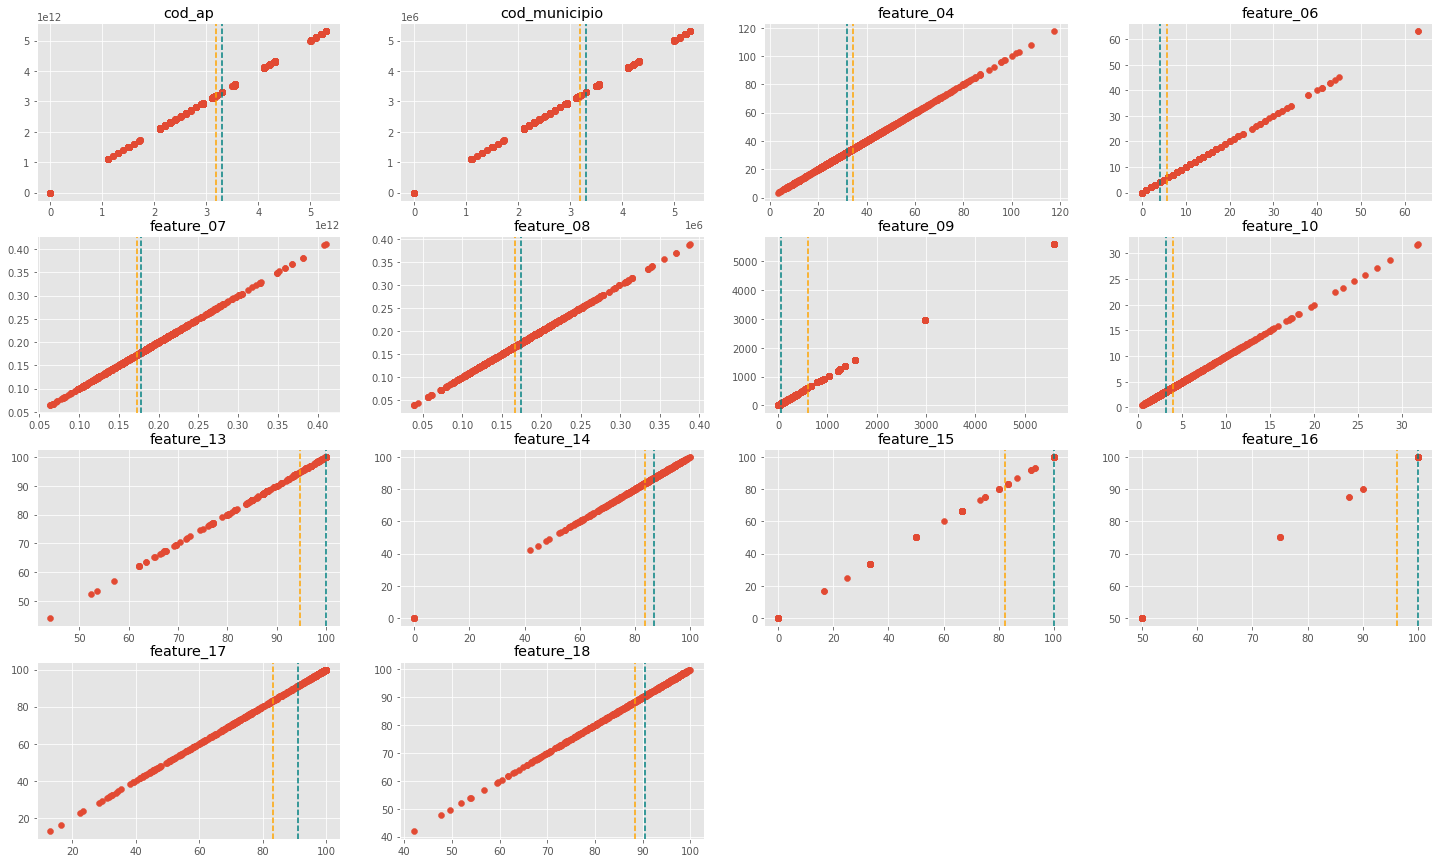

In [9]:
plt.figure(figsize = (25, 15))

plt_i = 1

for i in atributos_continuos:
    plt.subplot(4, 4, plt_i)

    # Mostra a distribuição dos dados
    plt.scatter(data[i], data[i])
    # Obtem algumas estatísticas dos dados
    mean = np.nanmean(data[i])
    median = np.nanmedian(data[i])

    plt.axvline(x = np.nanmean(data[i]), label = "Média", linestyle = "--", color = "orange")
    plt.axvline(x = np.nanmedian(data[i]), label = "Mediana", linestyle = "--", color = "teal")
    
    plt.title(i)

    plt_i = plt_i + 1

plt.show()

In [10]:
data_sem_na = data.fillna("NaN")

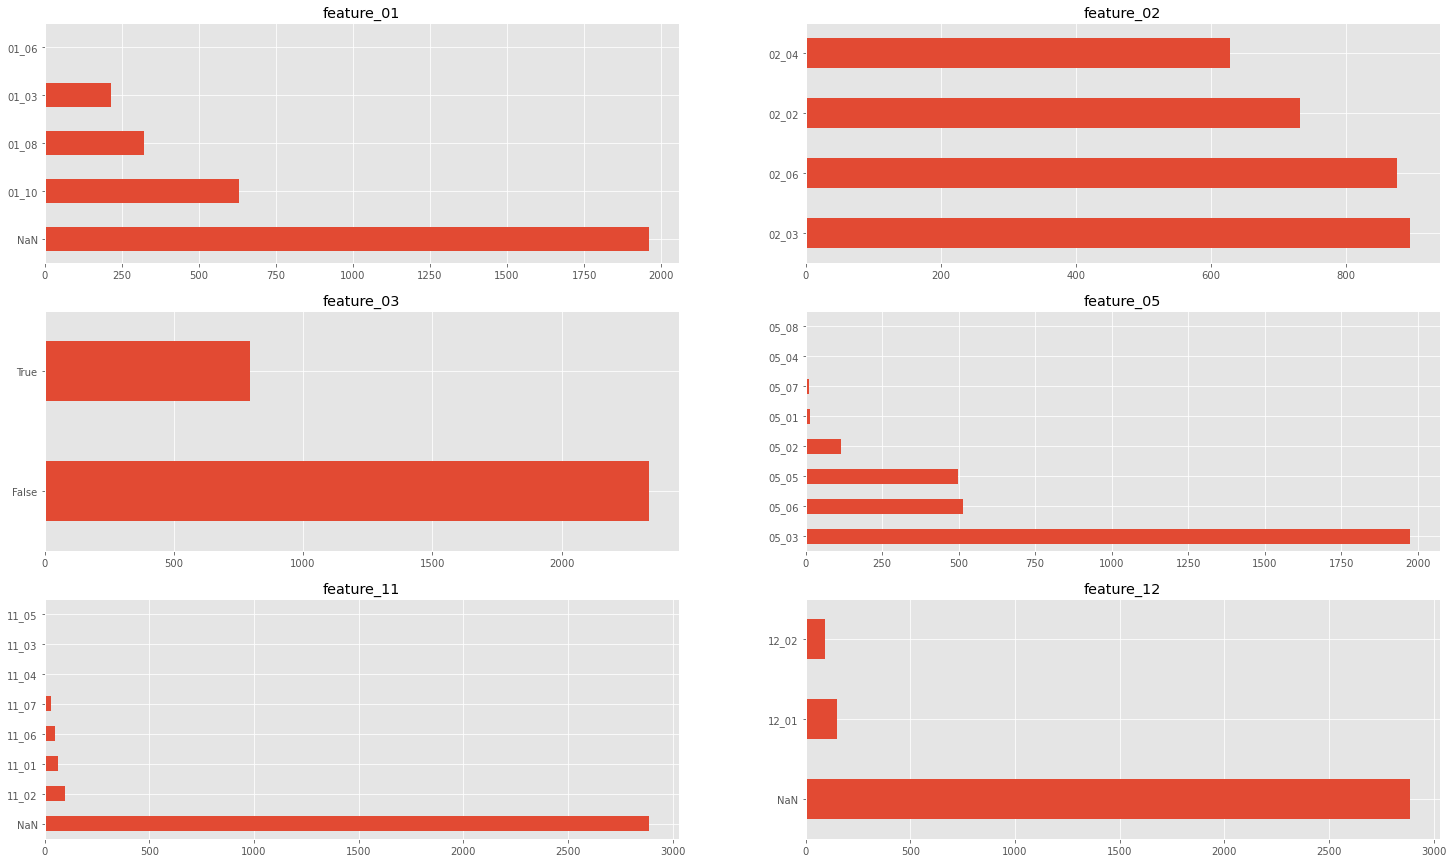

In [11]:
plt.figure(figsize = (25, 15))

plt_i = 1

for i in atributos_categoricos:
    plt.subplot(3, 2, plt_i)

    # Mostra a distribuição dos dados
    data_sem_na[i] = data_sem_na[i].apply(lambda x: str(x).replace("FEATURE_", "").replace("VALUE_", "") )
    data_sem_na[i].value_counts().plot(kind = "barh")
    
    plt.title(i)

    plt_i = plt_i + 1

plt.show()